In [54]:
import pandas as pd
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
!pip install -U gif
!pip install "gif[matplotlib]"
import gif

Requirement already up-to-date: gif in /usr/local/lib/python3.7/dist-packages (3.0.0)


# 1. Loading the Iris Dataset

In [55]:
from sklearn.datasets import load_iris
 
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

# 2. Describing the dataset

In [56]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [57]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# 3. Getting the correlation matrix of the dataset

In [60]:
corr = df.corr()

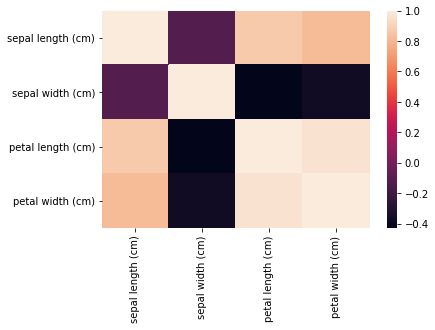

In [61]:
sns.heatmap(corr)

# 4. k-means

Some parts of the function is thaken from this [repo](https://github.com/ppai22/k-means-clustering-python/blob/77d50a2b508c63d6a74d8221d706554878f16771/KMeansClustering.py).

In [62]:
def euclidean_dist(p1, p2):
  return np.linalg.norm(np.array(p1) - np.array(p2))

In [63]:
def my_lovely_kmeans(dataset, k, iter_count, thresh):
  # randomly select k dataset points as centroids
  centroids = [dataset[i] for i in random.sample(range(len(dataset)), k)]
  # create an empty sequence for storing losses
  losses = []
  # save the mapping
  clusters = []
  indices = []
  index_history = []
  # Iterating
  for i in range(iter_count):
    new_clusters = [[] for c in range(k)]
    new_indices = [[] for c in range(k)]
    
    # assign each point to nearest centroid using euclidean distance measure
    for index in range(len(dataset)):
      p = dataset[index]
      distances = np.array([euclidean_dist(p, c) for c in centroids])
      new_clusters[np.argmin(distances)].append(p)
      new_indices[np.argmin(distances)].append(index)


    # compute loss and add it to the end of losses sequence
    curr_loss = []
    for c in new_clusters:
      mu = np.mean(c, axis=0)
      c_loss = sum([euclidean_dist(p, mu) ** 2 for p in c])
      curr_loss.append(c_loss)
    
    curr_loss = sum(curr_loss)
    losses.append(curr_loss)

    # if | loss_{i} - loss_{i-1} | < thresh
    if i > 0 and abs(losses[i] - losses[i - 1]) < thresh:
      break

    # update centroids
    centroids = [np.mean(c, axis=0) for c in new_clusters]
    clusters = new_clusters
    indices = new_indices
    index_history.append(indices)
  
  return centroids, clusters, indices, losses, index_history

# 5. Executing the k-means algorithm on iris dataset

In [64]:
np.unique(iris.target)

array([0, 1, 2])

We know from the taret that we have k = 3:

In [65]:
threshold = 70

In [66]:
centroids, clusters, indices, losses, index_history = my_lovely_kmeans(iris.data, 3, 100, 70)

In [67]:
centroids

[array([6.1       , 2.83768116, 4.70434783, 1.59130435]),
 array([7.08695652, 3.12608696, 6.01304348, 2.14347826]),
 array([5.04482759, 3.29137931, 1.73793103, 0.35862069])]

In [68]:
clusters

[[array([7. , 3.2, 4.7, 1.4]),
  array([6.4, 3.2, 4.5, 1.5]),
  array([6.9, 3.1, 4.9, 1.5]),
  array([5.5, 2.3, 4. , 1.3]),
  array([6.5, 2.8, 4.6, 1.5]),
  array([5.7, 2.8, 4.5, 1.3]),
  array([6.3, 3.3, 4.7, 1.6]),
  array([6.6, 2.9, 4.6, 1.3]),
  array([5.2, 2.7, 3.9, 1.4]),
  array([5.9, 3. , 4.2, 1.5]),
  array([6. , 2.2, 4. , 1. ]),
  array([6.1, 2.9, 4.7, 1.4]),
  array([6.7, 3.1, 4.4, 1.4]),
  array([5.6, 3. , 4.5, 1.5]),
  array([5.8, 2.7, 4.1, 1. ]),
  array([6.2, 2.2, 4.5, 1.5]),
  array([5.6, 2.5, 3.9, 1.1]),
  array([5.9, 3.2, 4.8, 1.8]),
  array([6.1, 2.8, 4. , 1.3]),
  array([6.3, 2.5, 4.9, 1.5]),
  array([6.1, 2.8, 4.7, 1.2]),
  array([6.4, 2.9, 4.3, 1.3]),
  array([6.6, 3. , 4.4, 1.4]),
  array([6.8, 2.8, 4.8, 1.4]),
  array([6.7, 3. , 5. , 1.7]),
  array([6. , 2.9, 4.5, 1.5]),
  array([5.8, 2.7, 3.9, 1.2]),
  array([6. , 2.7, 5.1, 1.6]),
  array([5.4, 3. , 4.5, 1.5]),
  array([6. , 3.4, 4.5, 1.6]),
  array([6.7, 3.1, 4.7, 1.5]),
  array([6.3, 2.3, 4.4, 1.3]),
  array(

In [69]:
 indices

[[50,
  51,
  52,
  53,
  54,
  55,
  56,
  58,
  59,
  61,
  62,
  63,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  94,
  95,
  96,
  97,
  99,
  101,
  103,
  106,
  110,
  111,
  113,
  114,
  115,
  116,
  119,
  121,
  123,
  126,
  127,
  128,
  132,
  133,
  134,
  137,
  138,
  141,
  142,
  145,
  146,
  147,
  148,
  149],
 [100,
  102,
  104,
  105,
  107,
  108,
  109,
  112,
  117,
  118,
  120,
  122,
  124,
  125,
  129,
  130,
  131,
  135,
  136,
  139,
  140,
  143,
  144],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  57,
  60,
  64,
  79,
  80,
  81,
  93,
  98]]

In [70]:
losses

[218.07060152350937, 110.1249300349825, 85.32131221719456]

In [71]:
indices[0]

[50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 99,
 101,
 103,
 106,
 110,
 111,
 113,
 114,
 115,
 116,
 119,
 121,
 123,
 126,
 127,
 128,
 132,
 133,
 134,
 137,
 138,
 141,
 142,
 145,
 146,
 147,
 148,
 149]

# 6. Visualizing the results

In [72]:
df.iloc[5]

sepal length (cm)    5.4
sepal width (cm)     3.9
petal length (cm)    1.7
petal width (cm)     0.4
Name: 5, dtype: float64

In [73]:
for i in range(len(indices)):
  df.loc[indices[i], 'cluster'] = int(i)

In [74]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2.0
1,4.9,3.0,1.4,0.2,2.0
2,4.7,3.2,1.3,0.2,2.0
3,4.6,3.1,1.5,0.2,2.0
4,5.0,3.6,1.4,0.2,2.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0
146,6.3,2.5,5.0,1.9,0.0
147,6.5,3.0,5.2,2.0,0.0
148,6.2,3.4,5.4,2.3,0.0


## 2D Plot

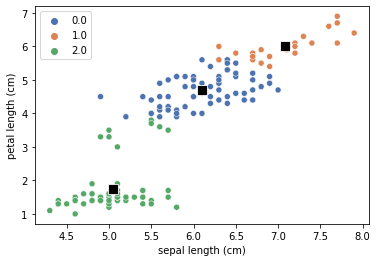

In [75]:
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df, 
                hue='cluster', palette="deep")

sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', 
                data=pd.DataFrame(centroids, columns=df.columns[:-1]), 
                color='k', marker="s", s=100)

## 3D Plot

Text(0.5, 0, 'petal_width')

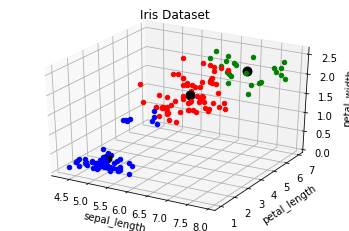

In [76]:
colors = ['r', 'g', 'b']
fig = plt.figure()
ax = plt.axes(projection="3d")

for i in range(len(indices)):
  for j in indices[i]:
    ax.scatter3D(df.iloc[j]['sepal length (cm)'], 
               df.iloc[j]['petal length (cm)'],
               df.iloc[j]['petal width (cm)'],
               color=colors[i])

for i in centroids:
  ax.scatter3D(i[0], i[2], i[3], color='k', s=80)

ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')

# 7. Confusion Matrix

In [77]:
df['target'] = iris.target

In [78]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,2.0,0
1,4.9,3.0,1.4,0.2,2.0,0
2,4.7,3.2,1.3,0.2,2.0,0
3,4.6,3.1,1.5,0.2,2.0,0
4,5.0,3.6,1.4,0.2,2.0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,2
146,6.3,2.5,5.0,1.9,0.0,2
147,6.5,3.0,5.2,2.0,0.0,2
148,6.2,3.4,5.4,2.3,0.0,2


In [79]:
k = len(df['cluster'].unique())

for i in range(k):
  mask = df['cluster'] == i
  label = int(df.loc[mask, 'target'].mode())
  df.loc[mask, 'y_pred'] = label

In [80]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,y_pred
0,5.1,3.5,1.4,0.2,2.0,0,0.0
1,4.9,3.0,1.4,0.2,2.0,0,0.0
2,4.7,3.2,1.3,0.2,2.0,0,0.0
3,4.6,3.1,1.5,0.2,2.0,0,0.0
4,5.0,3.6,1.4,0.2,2.0,0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,2,1.0
146,6.3,2.5,5.0,1.9,0.0,2,1.0
147,6.5,3.0,5.2,2.0,0.0,2,1.0
148,6.2,3.4,5.4,2.3,0.0,2,1.0


I used this [link](https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python/48030708) for the following code:

In [81]:
def compute_confusion_matrix(true, pred):
  K = len(np.unique(true))
  result = np.zeros((K, K))

  for i in range(len(true)):
    result[int(true[i])][int(pred[i])] += 1

  return result

In [82]:
conf_mat = compute_confusion_matrix(df['target'], df['y_pred'])

In [83]:
conf_mat

array([[50.,  0.,  0.],
       [ 8., 42.,  0.],
       [ 0., 27., 23.]])

# 8. Scores

In [84]:
def calculate_recall(conf_matrix):
  scores = {}
  for i in range(len(conf_matrix)):
    scores[i] = round(conf_matrix[i][i] / sum(conf_matrix[i]), 2)
  
  return scores

In [85]:
calculate_recall(conf_mat)

{0: 1.0, 1: 0.84, 2: 0.46}

In [86]:
def calculate_precision(conf_matrix):
  scores = {}
  for i in range(len(conf_matrix)):
    scores[i] = round(conf_matrix[i][i] / sum(conf_matrix[:, i]), 2)
  
  return scores

In [87]:
calculate_precision(conf_mat)

{0: 0.86, 1: 0.61, 2: 1.0}

In [88]:
def calculate_f1(conf_matrix):
  prec = calculate_precision(conf_matrix)
  recall = calculate_recall(conf_matrix)
  score = {}
  for i in prec.keys():
    score[i] = round(2 * prec[i] * recall[i] / (prec[i] + recall[i]), 2)
  
  return score

In [89]:
calculate_f1(conf_mat)

{0: 0.92, 1: 0.71, 2: 0.63}

I used this [link](https://towardsdatascience.com/multi-class-metrics-made-simple-the-kappa-score-aka-cohens-kappa-coefficient-bdea137af09c) for the following code:

In [90]:
def calculate_cohen_kappa(conf_matrix):
  total = conf_matrix.sum()
  agree = sum(np.diag(conf_matrix)) / total
  prob_1 = conf_matrix.sum(axis=0) / total
  prob_2 = conf_matrix.sum(axis=1) / total
  chance_agree = np.multiply(prob_1, prob_2).sum()
  kappa_score = (agree - chance_agree) / (1 - chance_agree)
  return kappa_score

In [91]:
calculate_cohen_kappa(conf_mat)

0.65

# 9. Evaluating Scores using sklearn

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [93]:
confusion_matrix(df['target'], df['y_pred'])

array([[50,  0,  0],
       [ 8, 42,  0],
       [ 0, 27, 23]])

In [94]:
print(classification_report(df['target'], df['y_pred']))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       0.61      0.84      0.71        50
           2       1.00      0.46      0.63        50

    accuracy                           0.77       150
   macro avg       0.82      0.77      0.75       150
weighted avg       0.82      0.77      0.75       150



In [95]:
cohen_kappa_score(df['target'], df['y_pred'])

0.65

# 10. Loss diagram

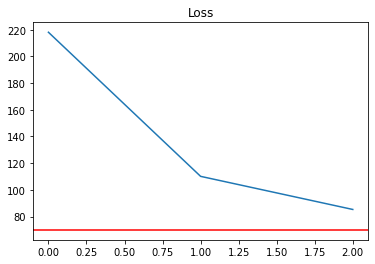

In [96]:
fig, ax = plt.subplots()
ax.plot(range(len(losses)), losses)
ax.set_title('Loss')
ax.axhline(y=threshold, color='r', linestyle='-')

# 11. Clustering gif

In [97]:
colors = ['r', 'g', 'b']

In [98]:
@gif.frame
def plot(indx):
    for i in range(len(indx)):
      for j in indx[i]:
        plt.scatter(df.iloc[j]['sepal length (cm)'], 
                    df.iloc[j]['petal length (cm)'],
                    color=colors[i])

In [99]:
frames = []
for i in index_history:
    frame = plot(i)
    frames.append(frame)

In [100]:
gif.save(frames, 'iris_kmeans.gif', duration=3.5, unit="s", between="startend")